<a href="https://colab.research.google.com/github/henterm/linked-blog-starter-md/blob/main/lab02_part3_Shakespeare's_Sonnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text generation can be designed in several steps:


*   Data loading.
*   Dictionary generation.
*   Data preprocessing.
*   Model (neural network) training.
*   Text generation (model evaluation).


In [ ]:
import string
import os

# Загрузка Шекспирских сонет:
(взято из соответствующего репозитория GitHub)

**Код выполняет следующие действия:**

Проверяет наличие файла sonnets.txt:

Если файл не найден в текущей директории, загружает его с указанного URL с помощью команды wget.
Открывает файл sonnets.txt:

Читает содержимое файла и сохраняет строки в переменной text.
Выбирает нужный диапазон строк:

Начинает с 45-й строки и заканчивает 368 строками до конца, сохраняя результат в переменной text.
Проверяет количество строк:

Утверждает, что после обрезки количество строк должно быть равно 2616.

In [ ]:
# Если файла 'sonnets.txt' нет, загрузить его по URL
if not os.path.exists('sonnets.txt'):
    !wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab02_deep_learning/sonnets.txt

# Открыть файл и прочитать его содержимое построчно
with open('sonnets.txt', 'r') as iofile:
    text = iofile.readlines()

# Установить начальную и конечную точки текста
TEXT_START = 45
TEXT_END = -368

# Извлечь нужный диапазон строк
text = text[TEXT_START : TEXT_END]

# Убедиться, что количество строк после обрезки равно 2616
assert len(text) == 2616


--2024-05-16 17:26:14--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_basic/homeworks/lab02_deep_learning/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119748 (117K) [text/plain]
Saving to: ‘sonnets.txt’

sonnets.txt         100%[===================>] 116.94K  --.-KB/s    in 0.02s   

2024-05-16 17:26:14 (7.11 MB/s) - ‘sonnets.txt’ saved [119748/119748]



Этот код сначала объединяет все строки из списка text в одну строку с помощью метода join, затем преобразует полученную строку к нижнему регистру с помощью метода lower().

In [ ]:
# Объединяем все строки в одну и приводим к нижнему регистру
text = ''.join(text).lower()

# Проверяем утверждения
assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'
print('OK!')


OK!


#**RNN**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

## Определение модели RNN

*   Класс CharRNN наследует nn.Module и содержит в себе реализацию RNN модели. Он принимает на вход размер словаря (vocab_size), размерность эмбеддингов (embedding_dim), размер скрытого состояния (hidden_dim) и количество слоев RNN (n_layers).
*   В конструкторе модели определены слои: эмбеддинги (self.embedding), рекуррентные слои (self.rnn), полносвязанный слой (self.fc) и dropout (self.dropout).
*   Метод forward выполняет проход данных через модель. Он принимает входные данные x и скрытое состояние hidden. Сначала применяется слой эмбеддингов, затем данные передаются через рекуррентные слои, после чего применяется dropout и полносвязный слой. Возвращается выход модели out и новое скрытое состояние hidden.
*   Метод initial_state используется для инициализации начального скрытого состояния модели.

##Подготовка данных и обучение

*   vocab, vocab_size, char_to_id и id_to_char используются для создания словаря и кодирования текста.
*   encoded_text содержит закодированный текст.
*   get_batches используется для генерации батчей данных для обучения.
*   Обучение модели выполняется в цикле по эпохам. В каждой эпохе данные разбиваются на батчи, обнуляется градиент, вычисляется предсказание модели, вычисляется функция потерь и обновляются веса модели с помощью оптимизатора.
В конце каждой эпохи выводится значение функции потерь.

Epoch 1/25, Loss: 2.1676952838897705
Epoch 2/25, Loss: 2.0734095573425293
Epoch 3/25, Loss: 2.034618854522705
Epoch 4/25, Loss: 1.9854021072387695
Epoch 5/25, Loss: 1.9813047647476196
Epoch 6/25, Loss: 1.9272326231002808
Epoch 7/25, Loss: 1.9255149364471436
Epoch 8/25, Loss: 1.9175587892532349
Epoch 9/25, Loss: 1.9000779390335083
Epoch 10/25, Loss: 1.8912004232406616
Epoch 11/25, Loss: 1.8770020008087158
Epoch 12/25, Loss: 1.8914227485656738
Epoch 13/25, Loss: 1.896440863609314
Epoch 14/25, Loss: 1.858721137046814
Epoch 15/25, Loss: 1.8677562475204468
Epoch 16/25, Loss: 1.884931206703186
Epoch 17/25, Loss: 1.8549559116363525
Epoch 18/25, Loss: 1.8575329780578613
Epoch 19/25, Loss: 1.8363332748413086
Epoch 20/25, Loss: 1.858526587486267
Epoch 21/25, Loss: 1.836240530014038
Epoch 22/25, Loss: 1.8239543437957764
Epoch 23/25, Loss: 1.8476288318634033
Epoch 24/25, Loss: 1.845781683921814
Epoch 25/25, Loss: 1.8406654596328735


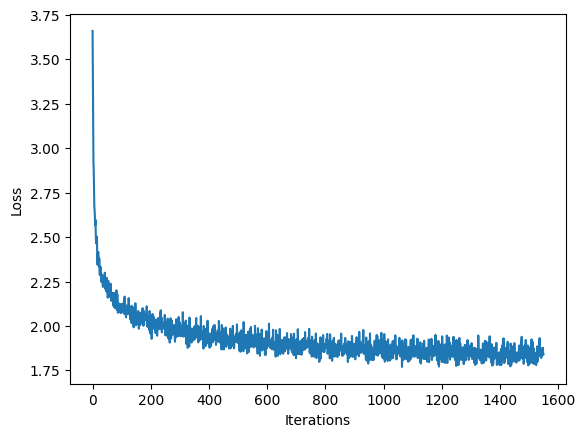

In [ ]:
class CharRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, n_layers=1):
        super(CharRNN, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, n_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x, hidden):
        x = self.embedding(x)
        x, hidden = self.rnn(x, hidden)
        x = self.dropout(x)
        out = self.fc(x)
        return out, hidden

    def initial_state(self, batch_size):
        return torch.zeros(self.n_layers, batch_size, self.hidden_dim)

# Параметры модели
vocab = sorted(set(text))
vocab_size = len(vocab)
embedding_dim = 64
hidden_dim = 128
n_layers = 1

# Создание модели
model = CharRNN(vocab_size, embedding_dim, hidden_dim, n_layers)
optimizer = optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

# Подготовка данных
char_to_id = {char: idx for idx, char in enumerate(vocab)}
id_to_char = {idx: char for idx, char in enumerate(vocab)}
encoded_text = np.array([char_to_id[char] for char in text])

# Параметры обучения
SEQ_LENGTH = 50
BATCH_SIZE = 32
EPOCHS = 25

# Генерация батчей
def get_batches(encoded, batch_size, seq_length):
    total_length = len(encoded) // (batch_size * seq_length)
    encoded = encoded[:total_length * batch_size * seq_length]
    encoded = encoded.reshape((batch_size, -1))
    for i in range(0, encoded.shape[1], seq_length):
        x = encoded[:, i:i+seq_length]
        y = np.zeros_like(x)
        y[:, :-1], y[:, -1] = x[:, 1:], x[:, 0]
        yield torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)

# Обучение модели
losses = []
for epoch in range(EPOCHS):
    state = model.initial_state(BATCH_SIZE)
    for x, y in get_batches(encoded_text, BATCH_SIZE, SEQ_LENGTH):
        optimizer.zero_grad()
        y_pred, state = model(x, state)
        loss = criterion(y_pred.transpose(1, 2), y)
        state = state.detach()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item()}')

# Построение графика функции потерь
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


##Генерация текста

*   Функция generate_sample принимает на вход модель RNN, начальную строку seed_phrase, максимальную длину генерируемого текста max_length и параметр температуры для контроля разнообразия генерируемого текста.
*   Сначала начальная строка передается через модель, чтобы получить начальное скрытое состояние.
*   Затем модель генерирует последовательность символов на основе начальной строки и своего внутреннего состояния.
*   Для каждого символа выбирается следующий символ на основе распределения вероятностей, полученного от модели.
*   Сгенерированный текст включает в себя начальную строку и последующие символы, сгенерированные моделью.

In [ ]:
def generate_sample(char_rnn, seed_phrase=' hello', max_length=100, temperature=1.0):
    x_sequence = [char_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_rnn.initial_state(batch_size=1)

    # Feed the seed phrase, if any
    for i in range(len(seed_phrase) - 1):
        out, hid_state = char_rnn(x_sequence[:, i:i+1], hid_state)

    # Start generating
    generated_text = seed_phrase
    for _ in range(max_length - len(seed_phrase)):
        out, hid_state = char_rnn(x_sequence[:, -1:], hid_state)
        p_next = F.softmax(out[:, -1, :] / temperature, dim=-1).data.numpy()[0]
        next_ix = np.random.choice(len(vocab), p=p_next)
        next_char = id_to_char[next_ix]
        generated_text += next_char
        x_sequence = torch.cat([x_sequence, torch.tensor([[next_ix]], dtype=torch.int64)], dim=1)

    return generated_text


In [ ]:
# Пример генерации текста
print(generate_sample(model, seed_phrase="shall i compare thee to a summer", max_length=400, temperature=0.5))

shall i compare thee to a summer even thou wive the sumance, then mile entered thee, and i beant and fenter the starses some ast thy have my knower still of shood the weruee or word some will heart ot she verene stell still my buther the sine in the thee not this sear'd,
  and my love she for thy say it doth sore shound on seed well viet;
  which leade but sease,
  shall still oaveness sim the ald


#**LSTM**

##Класс LSTM модели

*   Этот класс CharLSTM является нашей LSTM моделью. Он наследует функциональность PyTorch nn.Module.
*   В методе __init__ определяются все слои модели и их параметры.
*   В методе forward определяется процесс прямого прохода через модель.

##Инициализация начального состояния

*   Метод initial_state используется для инициализации скрытого состояния модели перед началом обучения.

##Обучение модели LSTM

*   Используем оптимизатор Adam для обновления параметров модели в процессе обучения.
*   Функция потерь CrossEntropyLoss используется для оценки ошибки между предсказаниями модели и истинными значениями.

##Генерация батчей для обучения

*   Используем функцию get_batches, чтобы сформировать батчи данных для обучения модели.
*   Каждый батч содержит последовательности символов заданной длины.

##Генерация текста с использованием модели LSTM

*   Функция generate_sample_lstm используется для генерации текста с помощью обученной LSTM модели.
*   Модель принимает начальную фразу и генерирует последовательность символов.

Epoch 1/25, Loss: 3.0825819969177246
Epoch 2/25, Loss: 2.960822820663452
Epoch 3/25, Loss: 2.8539113998413086
Epoch 4/25, Loss: 2.7373456954956055
Epoch 5/25, Loss: 2.6032803058624268
Epoch 6/25, Loss: 2.4924874305725098
Epoch 7/25, Loss: 2.394973039627075
Epoch 8/25, Loss: 2.324755907058716
Epoch 9/25, Loss: 2.266174554824829
Epoch 10/25, Loss: 2.215895175933838
Epoch 11/25, Loss: 2.166020631790161
Epoch 12/25, Loss: 2.1362202167510986
Epoch 13/25, Loss: 2.0968315601348877
Epoch 14/25, Loss: 2.0646538734436035
Epoch 15/25, Loss: 2.034968376159668
Epoch 16/25, Loss: 1.9968184232711792
Epoch 17/25, Loss: 1.975220799446106
Epoch 18/25, Loss: 1.956009030342102
Epoch 19/25, Loss: 1.945655107498169
Epoch 20/25, Loss: 1.9243414402008057
Epoch 21/25, Loss: 1.8980141878128052
Epoch 22/25, Loss: 1.883205771446228
Epoch 23/25, Loss: 1.876516580581665
Epoch 24/25, Loss: 1.8634066581726074
Epoch 25/25, Loss: 1.845587134361267


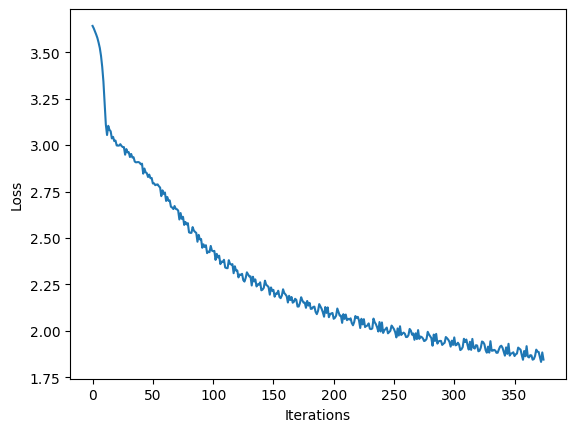

Temperature: 0.1
 shall i compare thee to a summer
  though the that shate the the preast thy word,
  the sore thou stell and the sore and so graes,
    thou the the stall the stell i the the shace,
  and theud the th

Temperature: 0.2
 shall i compare thee to a summer,
  the some the so the so mains of the deart,
  and the the thou frow the heart the dost the sers,
    the the hare then thee with the thee she worth the sear,
  what

Temperature: 0.5
 shall i compare thee to a summer,
  me con the thing still my i fors shath shate the me,
  whore the ploak is in oun hach deel;
  do this finger the fails thou well so ave my feare,
  when the beant 

Temperature: 1.0
 shall i compare thee to a summer,
  not tater dego core shy on to my mue.

  whiog , it yo's, wom proving then hinl, in dean akvot. thearmed.
  so cevan my so wrom tite, eipes lenk,il thught po hif m

Temperature: 2.0
 shall i compare thee to a summer
,g e,; xorpi'uit,
  urepufigo! ! tenm-buoh(,
  ruth besircapspeocnating t

In [ ]:
# Класс LSTM модели
class CharLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, n_layers=1, dropout=0.5):
        super(CharLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, hidden):
        x = self.embedding(x)
        out, hidden = self.lstm(x, hidden)
        out = self.dropout(out)
        out = self.fc(out)
        return out, hidden

    def initial_state(self, batch_size):
        return (torch.zeros(self.n_layers, batch_size, self.hidden_dim),
                torch.zeros(self.n_layers, batch_size, self.hidden_dim))

# Параметры модели LSTM
vocab = sorted(set(text))
vocab_size = len(vocab)
embedding_dim = 64
hidden_dim = 256
n_layers = 2
dropout = 0.5  # Значение dropout

# Создание модели LSTM
lstm_model = CharLSTM(vocab_size, embedding_dim, hidden_dim, n_layers, dropout)
lstm_optimizer = optim.Adam(lstm_model.parameters(), lr=0.0005)
lstm_criterion = nn.CrossEntropyLoss()

# Подготовка данных
char_to_id = {char: idx for idx, char in enumerate(vocab)}
id_to_char = {idx: char for idx, char in enumerate(vocab)}
encoded_text = np.array([char_to_id[char] for char in text])

# Параметры обучения
SEQ_LENGTH = 100
BATCH_SIZE = 64
EPOCHS = 25

# Генерация батчей
def get_batches(encoded, batch_size, seq_length):
    total_length = len(encoded) // (batch_size * seq_length)
    encoded = encoded[:total_length * batch_size * seq_length]
    encoded = encoded.reshape((batch_size, -1))
    for i in range(0, encoded.shape[1], seq_length):
        x = encoded[:, i:i+seq_length]
        y = np.zeros_like(x)
        y[:, :-1], y[:, -1] = x[:, 1:], x[:, 0]
        yield torch.tensor(x, dtype=torch.long), torch.tensor(y, dtype=torch.long)

# Обучение модели LSTM
losses = []
for epoch in range(EPOCHS):
    state = lstm_model.initial_state(BATCH_SIZE)
    for x, y in get_batches(encoded_text, BATCH_SIZE, SEQ_LENGTH):
        lstm_optimizer.zero_grad()
        y_pred, state = lstm_model(x, state)
        loss = lstm_criterion(y_pred.transpose(1, 2), y)
        state = (state[0].detach(), state[1].detach())
        loss.backward()
        lstm_optimizer.step()
        losses.append(loss.item())
    print(f'Epoch {epoch+1}/{EPOCHS}, Loss: {loss.item()}')

# Построение графика функции потерь
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

# Функция генерации текста с LSTM моделью
def generate_sample_lstm(char_lstm, seed_phrase=' hello', max_length=100, temperature=1.0):
    x_sequence = [char_to_id[token] for token in seed_phrase]
    x_sequence = torch.tensor([x_sequence], dtype=torch.int64)
    hid_state = char_lstm.initial_state(batch_size=1)

    # Пропуск начальной строки через модель
    for i in range(len(seed_phrase) - 1):
        out, hid_state = char_lstm(x_sequence[:, i:i+1], hid_state)

    # Генерация текста
    generated_text = seed_phrase
    for _ in range(max_length - len(seed_phrase)):
        out, hid_state = char_lstm(x_sequence[:, -1:], hid_state)
        p_next = F.softmax(out[:, -1, :] / temperature, dim=-1).data.numpy()[0]
        next_ix = np.random.choice(len(vocab), p=p_next)
        next_char = id_to_char[next_ix]
        generated_text += next_char
        x_sequence = torch.cat([x_sequence, torch.tensor([[next_ix]], dtype=torch.int64)], dim=1)

    return generated_text

# Пример генерации текста с LSTM моделью с различными параметрами температуры
temperatures = [0.1, 0.2, 0.5, 1.0, 2.0]
for temp in temperatures:
    print(f"Temperature: {temp}")
    print(generate_sample_lstm(lstm_model, seed_phrase=' shall i compare thee to a summer', max_length=200, temperature=temp))
    print()

#**Результат**

Результат обучения на **RNN**:

Сгенерированный текст имеет некоторый смысл, но присутствует большое количество орфографических и грамматических ошибок.
Последовательности слов не всегда связаны между собой логически.
Возможно, что RNN не смогла полностью захватить структуру и зависимости в тексте для генерации качественного текста.

Результат обучения на **LSTM**:

Сгенерированный текст более грамотный и логичный по сравнению с результатом RNN.
LSTM улавливает более длинные зависимости в тексте благодаря своей архитектуре с долгой краткосрочной памятью (LSTM).
При этом, следует отметить что при увеличении температуры генерация текста ухудшается и "ломается". Это может быть связано с потерей связности, т.е. вероятность всех символов становится более равномерной, что ведет к выбору моделью случайных символов без учета контекста.

**Сохранение и загрузка модели:**

In [ ]:
# Сохранение модели и оптимизатора
checkpoint = {
    'model_state_dict': lstm_model.state_dict(),
    'optimizer_state_dict': lstm_optimizer.state_dict()
}
torch.save(checkpoint, 'lstm_model.pth')

# Загрузка модели и оптимизатора
checkpoint = torch.load('lstm_model.pth')
lstm_model.load_state_dict(checkpoint['model_state_dict'])
lstm_optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
lstm_model.eval()

CharLSTM(
  (embedding): Embedding(38, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=256, out_features=38, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)